In [1]:
using InteractiveUtils
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-3210M CPU @ 2.50GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, ivybridge)


In [2]:
module CircleFitting

using Distributions

using Plots
gr()

show_animation = true

function circle_fitting(x, y)
    sumx = sum(x)
    sumy = sum(y)
    
    sumx2 = sum([ix ^ 2 for ix in x])
    sumy2 = sum([iy ^ 2 for iy in y])
    
    sumxy = sum([ix * iy for (ix, iy) in zip(x, y)])
    
    F = [sumx2 sumxy sumx; sumxy sumy2 sumy; sumx sumy length(x)]
    
    G = [-sum([ix ^ 3 + ix * iy ^ 2 for (ix, iy) in zip(x, y)]); -sum([ix ^ 2 * iy + iy ^ 3 for (ix, iy) in zip(x, y)]); -sum([ix ^ 2 + iy ^ 2 for (ix, iy) in zip(x, y)])]
    
    T = inv(F) * G

    cxe = T[1] / -2.0
    cye = T[2] / -2.0    
    re = sqrt(cxe^2 + cye^2 - T[3])
    
    error = sum([hypot(cxe - ix, cye - iy) - re for (ix, iy) in zip(x, y)])
    
    return cxe, cye, re, error    
end

function get_sample_points(cx, cy, cr, angle_reso)
    x, y, angle, r = [], [], [], []
    
    for theta in 0.0:angle_reso:2.0*pi
        nx = cx + cr * cos(theta)
        ny = cy + cr * sin(theta)
        nangle = atan(ny, nx)
        nr = hypot(nx, ny) * rand(Uniform(0.95, 1.05))
        
        append!(x, nx)
        append!(y, ny)
        append!(angle, nangle)
        append!(r, nr)
    end
    
    rx, ry = ray_casting_filter(x, y, angle, r, angle_reso)
    
    return rx, ry
end

function ray_casting_filter(xl, yl, thetal, rangel, angle_reso)
    rx, ry = [], []
    rangedb = [Inf for _ in 1:Int(floor(pi*2.0/angle_reso))+1]
    
    for iter in Iterators.enumerate(thetal)
        i = iter[1]
        angleid = Int(floor(thetal[i] / angle_reso))
        if(angleid <= 0)
            if rangedb[end+angleid] > rangel[i]
                rangedb[end+angleid] = rangel[i]
            end
        else
            if rangedb[angleid] > rangel[i]
                rangedb[angleid] = rangel[i]
            end
        end
            
    end
    
    for iter in Iterators.enumerate(rangedb)
        i = iter[1]
        t = i * angle_reso
        if rangedb[i] != Inf
            append!(rx, rangedb[i] * cos(t))
            append!(ry, rangedb[i] * sin(t))
        end
    end
    
    return rx, ry
end

function plot_circle(x, y, size, c="black", ls=:dash)
    deg = 0:5:360
    # push!(deg, 0)
    
    xl = [x + size * cos(deg2rad(d)) for d in deg]
    yl = [y + size * sin(deg2rad(d)) for d in deg]
    plot!(xl, yl, color=c, linestyle=ls) 
end

function fitting()
    
    simtime = 15.0
    dt = 1.0
    
    cx = -2.0
    cy = -8.0
    cr = 1.0
    theta = deg2rad(30.0)
    angle_reso = deg2rad(3.0)
    
    time = 0.0
    
    while time <= simtime
        time += dt
        
        cx += cos(theta)
        cy += cos(theta)
        
        x, y = get_sample_points(cx, cy, cr, angle_reso)
        
        ex, ey, er, error = circle_fitting(x, y)
        @show error
        
        if show_animation
            scatter([0.0], [0.0], ms=5, marker=:star5, color="red", aspect_ratio=:equal)
            plot_circle(cx, cy, cr)
            scatter!([x], [y], ms=5, maker=:x, color="red")
            display(plot_circle(ex, ey, er, "red"))
        end
    end
end     

end

Main.CircleFitting

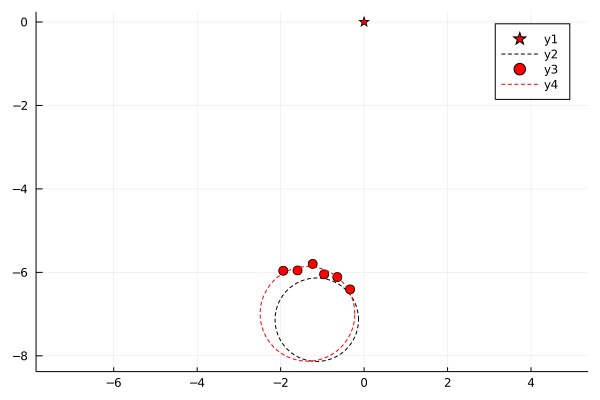

error = -0.010992848240181985
error = 

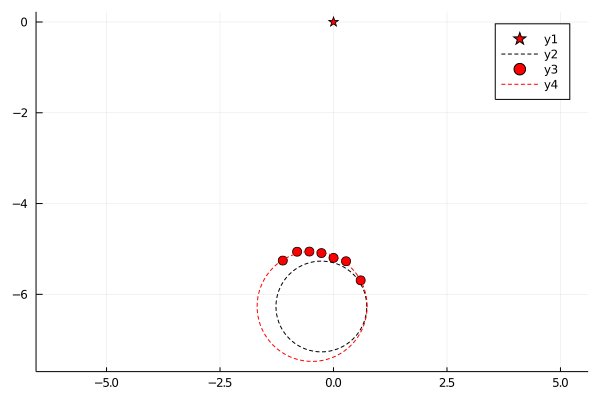

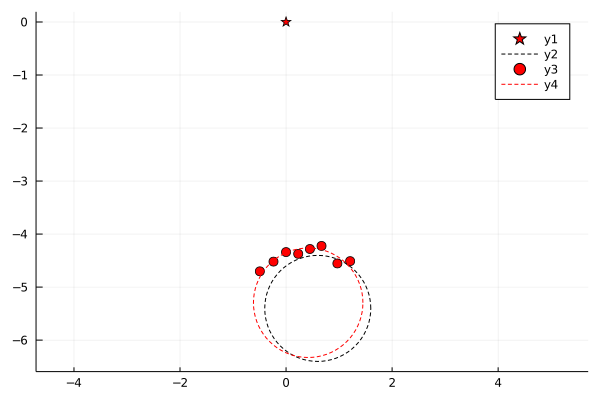

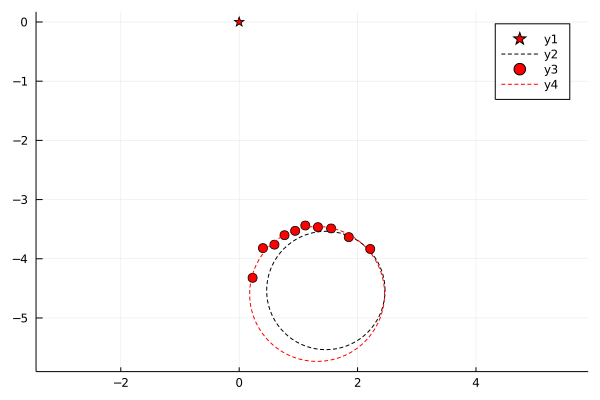

-0.002007642248324615
error = -0.017082001651500422
error = -0.004224685927705529


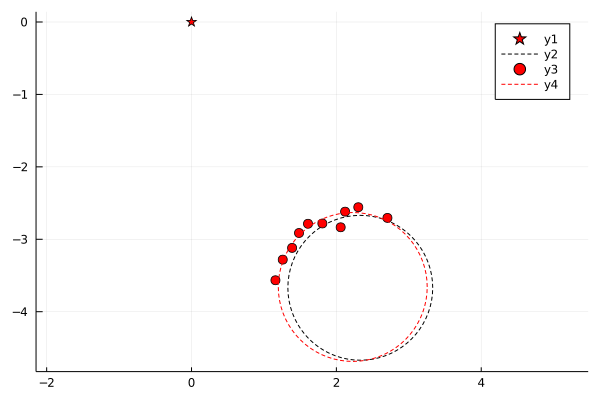

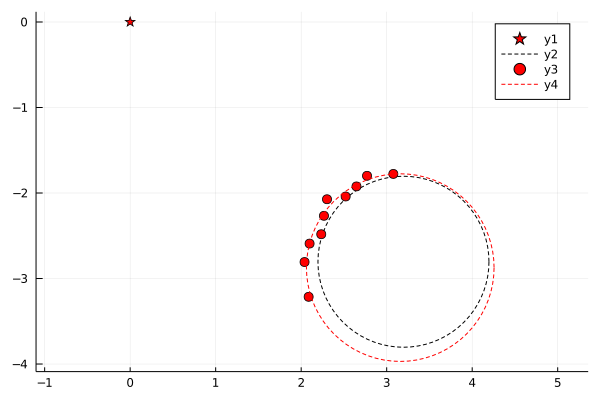

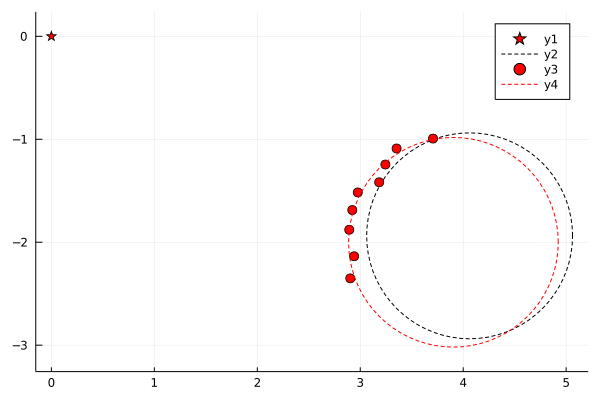

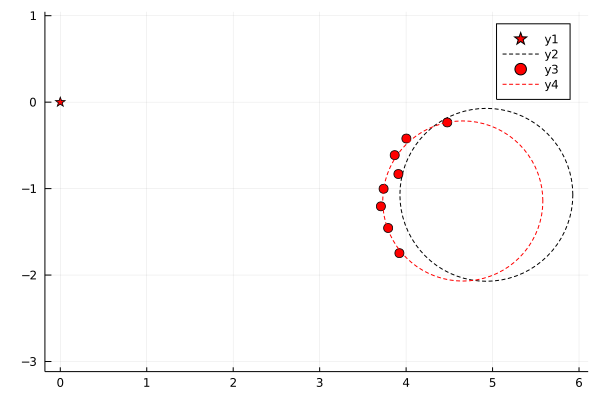

error = -0.02481767600170426
error = -0.009488753200523448
error = -0.007661526719147882
error = -0.009718241504244496


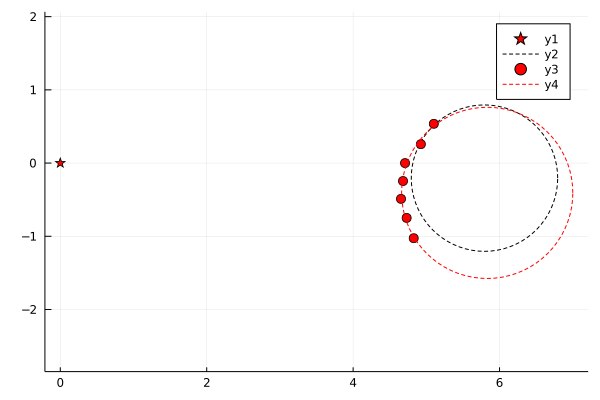

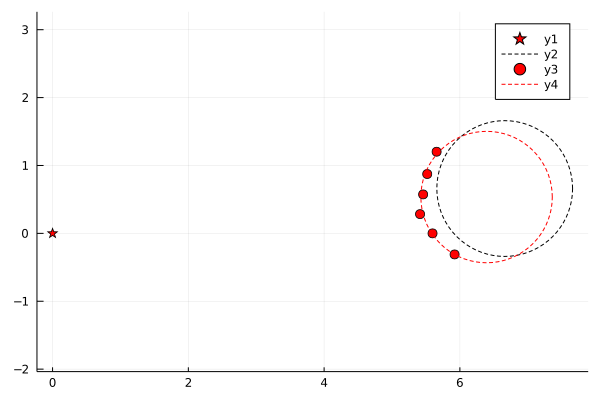

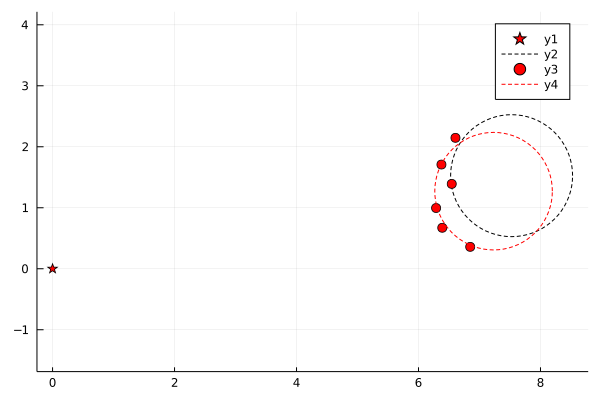

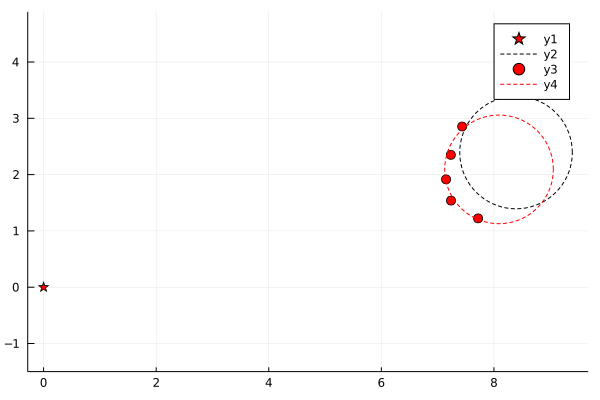

error = -0.0016059907650760596
error = -0.0023758351859989313
error = -0.0466735460504214
error = -0.005053752664874955


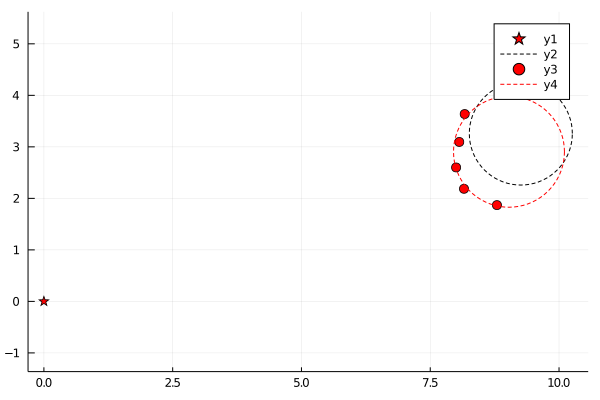

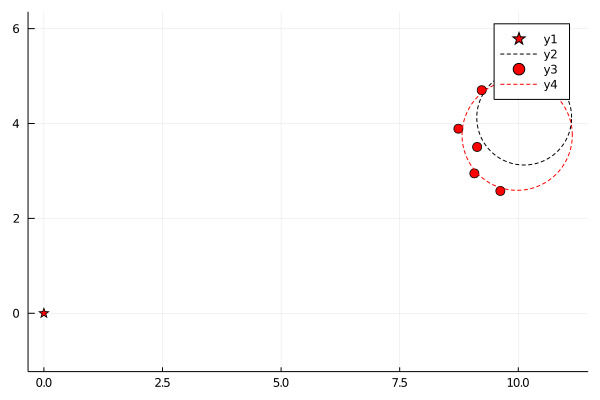

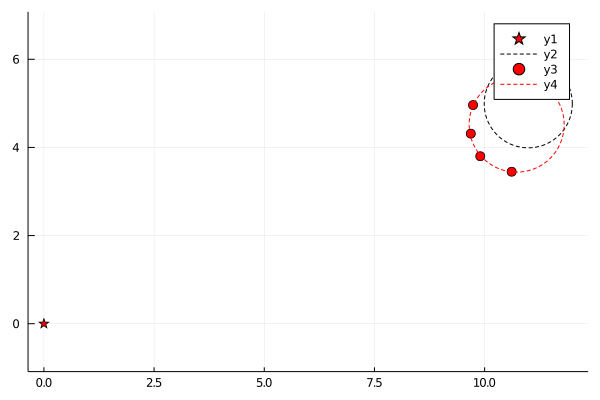

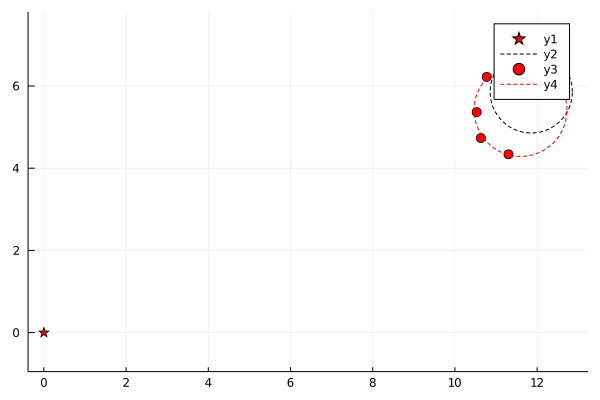

error = -0.006790230834515243
error = -0.041049773769512354
error = -0.0002812209950400213
error = -0.0031329991827384607


In [3]:
CircleFitting.fitting()